#### This code generates the figures 4 and 5 in the manuscript.

In [1]:
#Required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Choose a particular case here
#### Two cases: 'strong_cubic_foc_zero_phase' and 'strong_cubic_foc_nonzero_phase' 

In [2]:
# Choose case
case = 'strong_cubic_foc_zero_phase'; 

In [3]:
# Required info
dts = np.empty((2,10))
dts[0,:] = 10**np.linspace(-2,-3,10); 
dts[1,:] = 10**np.linspace(-2.5,-4,10);  # this one take long time to compute

if case == 'strong_cubic_foc_zero_phase':
    xL = -8; xR =8; L = xR-xL; t0 = 0;  inv = 1; 
    Eps = [0.2,0.1]; Ns = np.array([L*32*2,L*32*4]); T = 0.8; 
elif case == 'strong_cubic_foc_nonzero_phase':
    xL = -8; xR =8; L = xR-xL; t0 = 0;  inv = 1;
    Eps = [0.2,0.1]; Ns = np.array([L*32*2,L*32*4]); T = 0.5; 

# Info for reference solution    
N_ref = L*4096; dt_ref = 1e-4;

### Load data

In [4]:
#Load reference solution
df = pd.read_csv("./RefSolData/%s_RefSol_N_%d_dt_%1.e_Data.csv"%(case,N_ref,dt_ref),index_col=[0])
ref_sol = np.load("./RefSolData/%s_RefSol_N_%d_dt_%1.e.npy"%(case,N_ref,dt_ref), allow_pickle=True)

# Load numerical solution
Sol_b_ARK43 = np.load("./Data/%s_NumSol_B_ARK43.npy"%(case), allow_pickle=True)
Sol_r_ARK43 = np.load("./Data/%s_NumSol_R_ARK43.npy"%(case), allow_pickle=True)
Sol_OpSp2 = np.load("./Data/%s_NumSol_OpSp2.npy"%(case), allow_pickle=True)
Sol_OpSp4 = np.load("./Data/%s_NumSol_OpSp4.npy"%(case), allow_pickle=True)

RT_b_ARK43 = np.load("./Data/%s_RunTime_B_ARK43.npy"%(case), allow_pickle=True)
RT_r_ARK43  = np.load("./Data/%s_RunTime_R_ARK43.npy"%(case), allow_pickle=True)
RT_OpSp2  = np.load("./Data/%s_RunTime_OpSp2.npy"%(case), allow_pickle=True)
RT_OpSp4  = np.load("./Data/%s_RunTime_OpSp4.npy"%(case), allow_pickle=True)

### Reference solution on coarse grid

In [5]:
Err_b_ARK43 = np.empty((len(Eps),len(dts[0,:]),), dtype=object);
Err_r_ARK43 = np.empty((len(Eps),len(dts[0,:]),), dtype=object);
Err_OpSp2 = np.empty((len(Eps),len(dts[0,:]),), dtype=object);
Err_OpSp4 = np.empty((len(Eps),len(dts[0,:]),), dtype=object);
for i in range(len(Eps)):
    ep = Eps[i]; N = Ns[i]; skip = int(N_ref/Ns[i]); 
    ref_sol_T = ref_sol[i,0][::skip] # i corresponds to epsilon value 
    skip = int(N_ref/Ns[i])
    for j in range(len(dts[i,:])):
        Err_b_ARK43[i,j] = np.max(np.abs((ref_sol_T[:Ns[i]]+1j*ref_sol_T[Ns[i]:])- \
                                         (Sol_b_ARK43[i,j][:Ns[i]]+1j*Sol_b_ARK43[i,j][Ns[i]:])))
        Err_r_ARK43[i,j] = np.max(np.abs((ref_sol_T[:Ns[i]]+1j*ref_sol_T[Ns[i]:])- \
                                         (Sol_r_ARK43[i,j][:Ns[i]]+1j*Sol_r_ARK43[i,j][Ns[i]:])))
        Err_OpSp2[i,j] = np.max(np.abs((ref_sol_T[:Ns[i]]+1j*ref_sol_T[Ns[i]:])- \
                                         (Sol_OpSp2[i,j][:Ns[i]]+1j*Sol_OpSp2[i,j][Ns[i]:])))
        Err_OpSp4[i,j] = np.max(np.abs((ref_sol_T[:Ns[i]]+1j*ref_sol_T[Ns[i]:])- \
                                         (Sol_OpSp4[i,j][:Ns[i]]+1j*Sol_OpSp4[i,j][Ns[i]:])))

In [6]:
import os
path = './Figures/'
if not os.path.exists(path):
   os.makedirs(path)

### Convergence plots

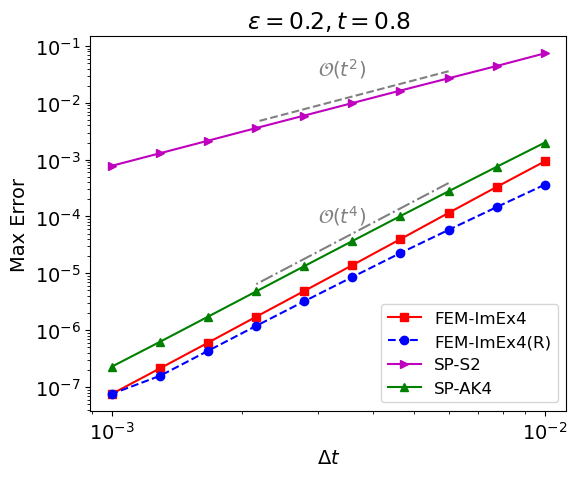

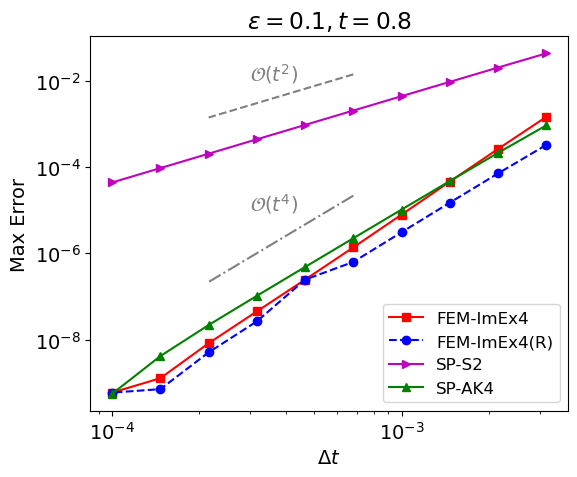

In [7]:
# Font size    
font = {#'family' : 'normal',
'weight' : 'normal',
'size'   : 14}
plt.rc('font', **font)

for i in range(len(Eps)):
    ep = Eps[i];
    fig = plt.figure(figsize=(6,5))
    plt.plot(dts[i,:],Err_b_ARK43[i],'s-r',label = 'FEM-ImEx4')
    plt.plot(dts[i,:],Err_r_ARK43[i],'o--b',label = 'FEM-ImEx4(R)')
    plt.plot(dts[i,:],Err_OpSp2[i],'>-m',label = 'SP-S2')
    plt.plot(dts[i,:],Err_OpSp4[i],'^-g',label = 'SP-AK4')
    plt.ylabel("Max Error"); plt.xlabel('$\Delta t$')
    plt.xscale("log"); plt.yscale("log")
    plt.legend(loc = "lower right",prop={'size':12})
    plt.title("$\epsilon = %1.1f, t = %1.1f$"%(Eps[i],T))
    plt.tight_layout()
    
    if case == 'strong_cubic_foc_zero_phase':
        if ep == 0.2:
            plt.plot(dts[i,2:7],1e3*dts[i,2:7]**2, "--", color="gray")
            plt.plot(dts[i,2:7],3e5*dts[i,2:7]**4, "-.", color="gray")
            plt.annotate(r"$\mathcal{O}(t^2)$", (3.0e-3, 3.0e-2), color="gray")
            plt.annotate(r"$\mathcal{O}(t^4)$", (3.0e-3, 8e-5), color="gray")
        elif ep == 0.1:
            plt.plot(dts[i,4:8],3e4*dts[i,4:8]**2, "--", color="gray")
            plt.plot(dts[i,4:8],1e8*dts[i,4:8]**4, "-.", color="gray")
            plt.annotate(r"$\mathcal{O}(t^2)$", (3.0e-4, 1.0e-2), color="gray")
            plt.annotate(r"$\mathcal{O}(t^4)$", (3.0e-4, 1e-5), color="gray")
    
    elif case == 'strong_cubic_foc_nonzero_phase':
        if ep == 0.2:
            plt.plot(dts[i,4:8],5e2*dts[i,4:8]**2, "--", color="gray")
            plt.plot(dts[i,4:8],3e5*dts[i,4:8]**4, "-.", color="gray")
            plt.annotate(r"$\mathcal{O}(t^2)$", (2.0e-3, 1.0e-2), color="gray")
            plt.annotate(r"$\mathcal{O}(t^4)$", (2.0e-3, 0.6e-4), color="gray")
        elif ep == 0.1:
            plt.plot(dts[i,4:8],3e4*dts[i,4:8]**2, "--", color="gray")
            plt.plot(dts[i,4:8],1e8*dts[i,4:8]**4, "-.", color="gray")
            plt.annotate(r"$\mathcal{O}(t^2)$", (3.0e-4, 1.0e-2), color="gray")
            plt.annotate(r"$\mathcal{O}(t^4)$", (3.0e-4, 1e-5), color="gray")

    plt.savefig('./Figures/%s_ErrConv_ep_%1.1f_t_%1.1f.pdf'%(case,Eps[i],T),format='pdf', bbox_inches="tight",transparent=True)



### Runtime plots

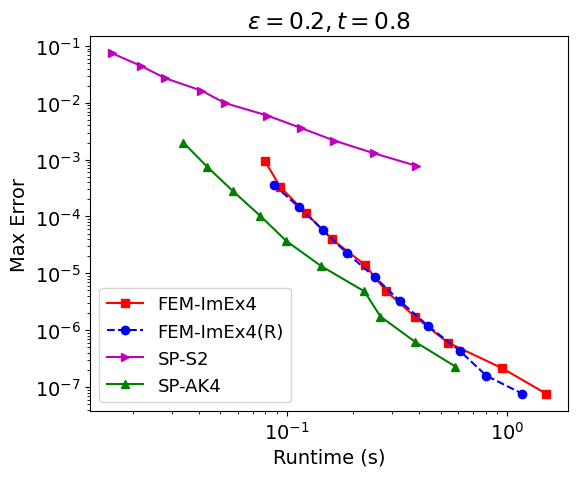

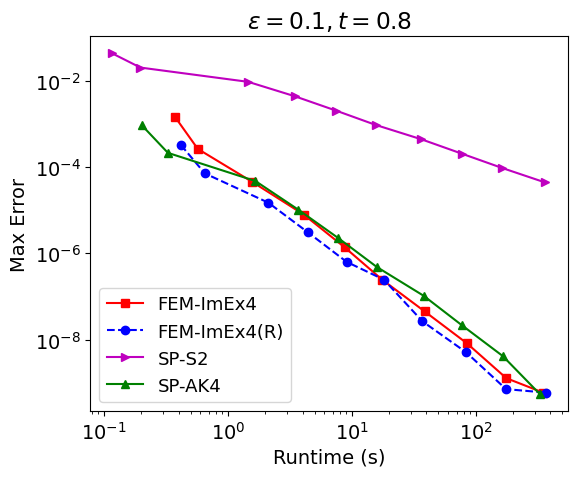

In [8]:
# Font size    
font = {#'family' : 'normal',
'weight' : 'normal',
'size'   : 14}
plt.rc('font', **font)

for i in range(len(Eps)):
    ep = Eps[i];
    fig = plt.figure(figsize=(6,5))
    plt.plot(RT_b_ARK43[i],Err_b_ARK43[i],'s-r',label = 'FEM-ImEx4')
    plt.plot(RT_r_ARK43[i],Err_r_ARK43[i],'o--b',label = 'FEM-ImEx4(R)')
    plt.plot(RT_OpSp2[i],Err_OpSp2[i],'>-m',label = 'SP-S2')
    plt.plot(RT_OpSp4[i],Err_OpSp4[i],'^-g',label = 'SP-AK4')
    plt.ylabel("Max Error"); plt.xlabel("Runtime (s)")
    plt.xscale("log"); plt.yscale("log")
    plt.legend(loc = "lower left",prop={'size':13})
    plt.title("$\epsilon = %1.1f, t = %1.1f$"%(Eps[i],T))
    plt.tight_layout()
    
    if case == 'strong_cubic_foc_zero_phase':
        if ep == 0.2:
            rt_ref = 10**np.linspace(-0.6,-1.5,10);
#             plt.plot(rt_ref,5e-5*rt_ref**(-2), "-.", color="gray")
#             plt.plot(rt_ref,4e-8*rt_ref**(-4), "--", color="gray")
#             plt.annotate(r"$\mathcal{O}(t^2)$", (1.5e-1, 0.3e-2), color="gray")
#             plt.annotate(r"$\mathcal{O}(t^4)$", (1.8e-1, 8e-5), color="gray")
        elif ep == 0.1:
            rt_ref = 10**np.linspace(0.5,1.7,10);
#             plt.plot(rt_ref,5e-2*rt_ref**(-1), "-.", color="gray")
#             plt.plot(rt_ref,4e-4*rt_ref**(-2), "--", color="gray")
#             plt.annotate(r"$\mathcal{O}(t^1)$", (7, 1.0e-2), color="gray")
#             plt.annotate(r"$\mathcal{O}(t^2)$", (7, 8e-6), color="gray")
    elif case == 'strong_cubic_foc_nonzero_phase':
        if ep == 0.2:
            rt_ref = 10**np.linspace(-0.9,-1.5,10);
#             plt.plot(rt_ref,5e-6*rt_ref**(-2), "-.", color="gray")
#             plt.plot(rt_ref,4e-9*rt_ref**(-4), "--", color="gray")
#             plt.annotate(r"$\mathcal{O}(t^2)$", (1e-1, 1.0e-3), color="gray")
#             plt.annotate(r"$\mathcal{O}(t^4)$", (1e-1, 8e-5), color="gray")
        elif ep == 0.1:
            rt_ref = 10**np.linspace(0.5,1.7,10);
#             plt.plot(rt_ref,5e-2*rt_ref**(-1), "-.", color="gray")
#             plt.plot(rt_ref,4e-4*rt_ref**(-2), "--", color="gray")
#             plt.annotate(r"$\mathcal{O}(t^1)$", (7, 1.0e-2), color="gray")
#             plt.annotate(r"$\mathcal{O}(t^2)$", (7, 8e-6), color="gray")
    
    plt.savefig('./Figures/%s_ErrRuntime_ep_%1.1f_t_%1.1f.pdf'%(case,Eps[i],T),format='pdf', bbox_inches="tight",transparent=True)